In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines
## numpy.argwhere(a) -- parameters a - input data
##returns- Indices of elements that are non-zero. Indices are grouped by element
def plot_points(X, y):
    ## here admitted and rejected is an array of data points.
    ## np.argwhere return indices of the value that are meeting the condition. so, for y==1, indices of those X are returned for which y is 1.
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    ## rejected and accepted are list of list. let's see there shape and data type
    #print(rejected)
    
    #print (type(rejected),rejected.shape,rejected.size,rejected)
    #for s in rejected:
    # s will be created as numpy array with dimensions- (1, 2)
    #    break
    ## s[0][0] - first element of array and s[0[1] - to access second element of array.
    ## for s in rejected to loop through all 50 elements of array in this scenario
    ## s parameter reprents the size of the marker
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 1)
    plt.plot(x, m*x+b, color,markersize=20)

# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

## Reading and plotting the data

In [161]:
# The code was removed by Watson Studio for sharing.

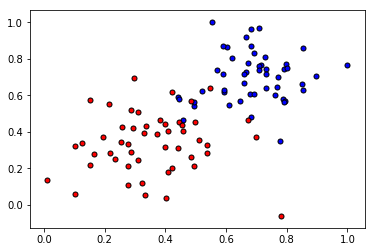

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [162]:
 ## here we are reading data from the watson object store. It is already read in the previous cell which is hidden

X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()
#data.info()
data.head()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [163]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    #print("x in sigmoid function - ",x)
    return 1/(1+np.exp(-x))

   

# Output (prediction) formula
def output_formula(features, weights, bias):
    #print("in output formula function - ",features.shape,weights.shape)          
    return sigmoid(np.dot(features, weights) + bias)          
    

# Error (log-loss) formula
def error_formula(y, output):
    return -y*np.log(output)- (1-y)*np.log(output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    #print('D-error is - ',d_error )
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias




 

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [164]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    ## number of records in the data is 100, # of features are 2 in the data
    n_records, n_features = features.shape
    last_loss = None
    ## weights are generated using normal distribution. size of the weights array (1,2) i.e w1 and w2 as we have 2 features.
    ## standard deviation of weights is 1 over " square root number of features". this is the spread of normal distribution
    weights = np.random.normal(scale=1 / n_features**.05, size=n_features)
    #print("weights are - ",weights)
    bias = 0
    ## An epoch is a single step in training a neural network; in other words when a neural network is trained on every training samples
    ## only in one pass we say that one epoch is finished. 
    for e in range(epochs):
        ## (1,2) zero shape array is generated using below code.. we have 2 features only
        del_w = np.zeros(weights.shape)
        ## Python zip function takes iterable elements as input, and returns iterator.
        for x, y in zip(features, targets):
            ## here output is y-hat... which is computed using this formula. i.e our prediction that we need to improve by updating weights
            output = output_formula(x, weights, bias)
            ## error is calucated for each record using the logistic regression formula. aka log loss funtion.
            error = error_formula(y, output)
            ## weights and bias are updated for each data point..so that new weights are calculated
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            ## if last_loss is true and current loss is greater than last lost, then below block of code is executed. 
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            ## prediction are set to true if predicted output (out) >0.5 and set to 0, if predicted output(out) is less than 0.5
            ## you can play around with prediction value...
            predictions = out > 0.5
            #print ("Predictions - ",targets )
            ## prediction array is compared with targets array.. 
            ## lets say that we have 100 values in the array, 80 are matched and 20 are not matched. so, in this case accuracy will be 
            ## 80/100 i.e 0.8 or 80%.
            accuracy = np.mean(predictions == targets)
            #print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            #print("test")
            ## a line will be plotted using this function. slope of this line is -weights[0]/weights[1] i.e w1/w2
            ## intercept of this line is -bias/weights[1] i.e b/w2
            ## equation of the line is w1x1+w2x2+b = 0  .. in slope/intercept form - x2 = -(w1/w2)*x1 - b/w2
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error . loss vs number of epochs.
    
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.671157931566
Predictions -  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.39

========== Epoch 10 ==========
Train loss:  0.912346489796   WARNING - Loss Increasing
Predictions -  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.6

========== Epoch 20 ==========
Train loss:  0.909075311189
Predictions -  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.76

========== Epoch 30 ==========
Train loss:  0.909369562837   WARNING - Loss Increasing
P

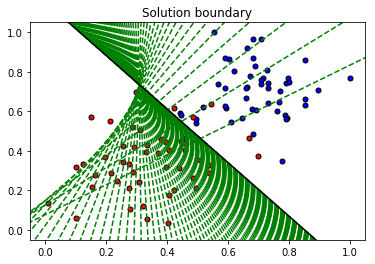

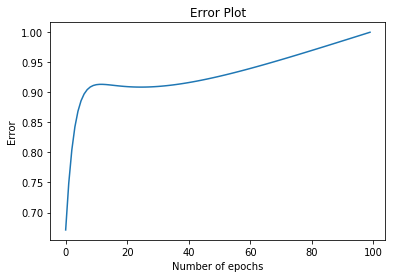

In [165]:
train(X, y, epochs, learnrate, True)